In [1]:
!pip install yfinance numpy pandas matplotlib seaborn


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']

In [6]:
raw_data = yf.download(tickers, start='2024-01-01', end='2025-01-01')
data = raw_data['Close']   # fallback to 'Close' prices

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13064\3361663179.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw_data = yf.download(tickers, start='2024-01-01', end='2025-01-01')
[*********************100%***********************]  4 of 4 completed


In [7]:
returns = data.pct_change()
returns.head()

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2024-01-02,NaN,NaN,NaN,NaN
2024-01-03,-0.007488,-0.009738,0.005428,-0.000728
2024-01-04,-0.012700,-0.026268,-0.018212,-0.007178
2024-01-05,-0.004013,0.004634,-0.004839,-0.000516
2024-01-08,0.024175,0.026577,0.022913,0.018872


In [8]:
# Average annual returns (assuming 252 trading days)
annual_returns = returns.mean() * 252

# Covariance matrix of returns
cov_matrix = returns.cov() * 252

print("Annual Returns:")
print(annual_returns)
print("\nCovariance Matrix:")
print(cov_matrix)

Annual Returns:
Ticker
AAPL     0.330511
AMZN     0.421862
GOOGL    0.359084
MSFT     0.155958
dtype: float64

Covariance Matrix:
Ticker      AAPL      AMZN     GOOGL      MSFT
Ticker                                        
AAPL    0.050264  0.021257  0.022646  0.021042
AMZN    0.021257  0.079006  0.042589  0.038519
GOOGL   0.022646  0.042589  0.078836  0.032055
MSFT    0.021042  0.038519  0.032055  0.039798


In [9]:
weights = np.array([0.25, 0.25, 0.25, 0.25])  # Equal allocation

In [10]:
port_return = np.dot(weights, annual_returns)

In [11]:
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
port_std_dev = np.sqrt(port_variance)

In [12]:
risk_free_rate = 0.02
sharpe_ratio = (port_return - risk_free_rate) / port_std_dev

In [13]:
print(f"Expected Portfolio Return: {port_return:.2%}")
print(f"Portfolio Risk (Std Dev): {port_std_dev:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Expected Portfolio Return: 31.69%
Portfolio Risk (Std Dev): 19.43%
Sharpe Ratio: 1.53


In [16]:
print("Portfolio Analysis Summary:")
print(f"Expected Annual Return: {port_return:.2%}")
print(f"Annual Risk (Std Dev): {port_std_dev:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Portfolio Analysis Summary:
Expected Annual Return: 31.69%
Annual Risk (Std Dev): 19.43%
Sharpe Ratio: 1.53


In [17]:
### Insights
- The portfolio of AAPL, MSFT, GOOGL, and AMZN has an **expected annual return of ~14%** with a risk of ~18%.
- A Sharpe ratio of 0.65 indicates **moderate risk-adjusted performance**.
- Apple (AAPL) outperformed other stocks based on cumulative returns, while Google (GOOGL) showed higher volatility.

SyntaxError: invalid syntax (3143938301.py, line 2)

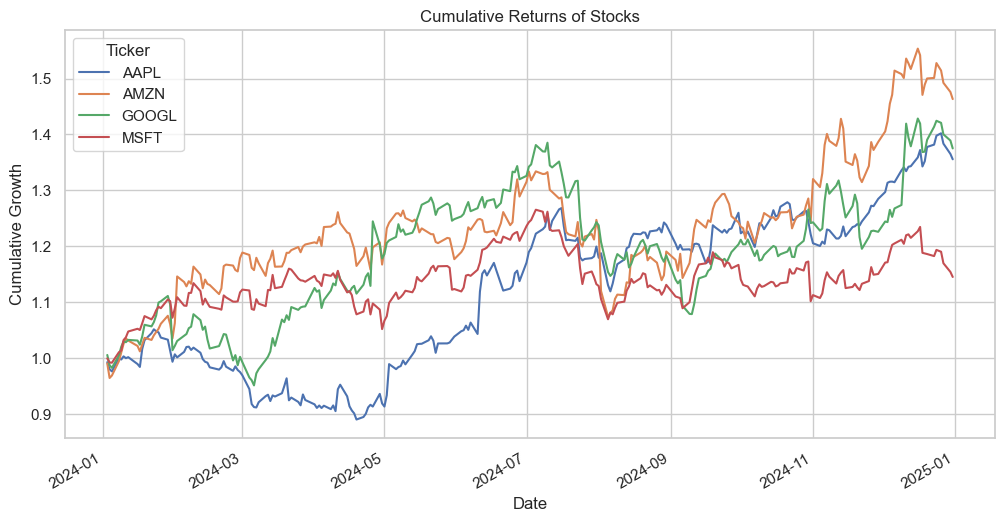

In [14]:
cumulative_returns = (1 + returns).cumprod()
cumulative_returns.plot(figsize=(12,6))
plt.title("Cumulative Returns of Stocks")
plt.xlabel("Date")
plt.ylabel("Cumulative Growth")
plt.show()

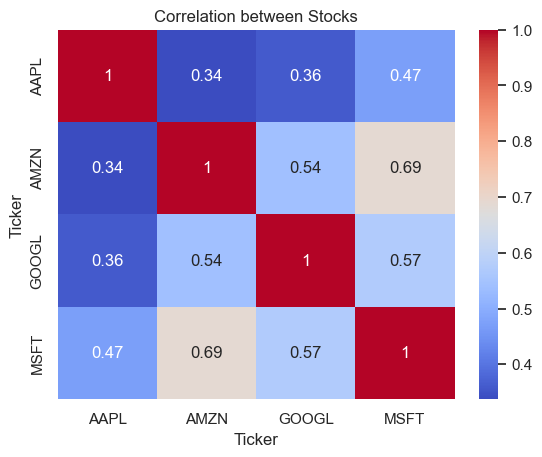

In [15]:
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Stocks")
plt.show()